In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Method 1  - OpenCV

In [2]:
image = cv2.imread("./image.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
_, processed_image = cv2.threshold(
    image, 
    0, 
    255, 
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

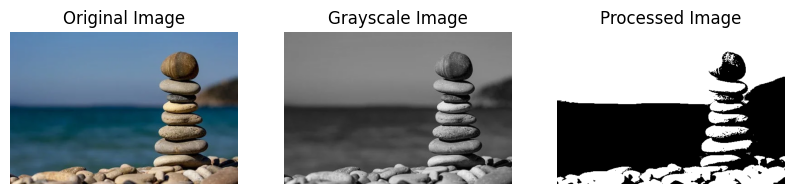

In [3]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.asarray(Image.open("./image.jpg")))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(processed_image, cmap='gray')
plt.title("Processed Image")
plt.axis('off')

plt.show()

# Method 2 - Using Image Histogram

In [4]:
image = cv2.imread("./image.jpg", cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image],[0],None,[256],[0,256])
normalized_hist = hist/hist.sum()

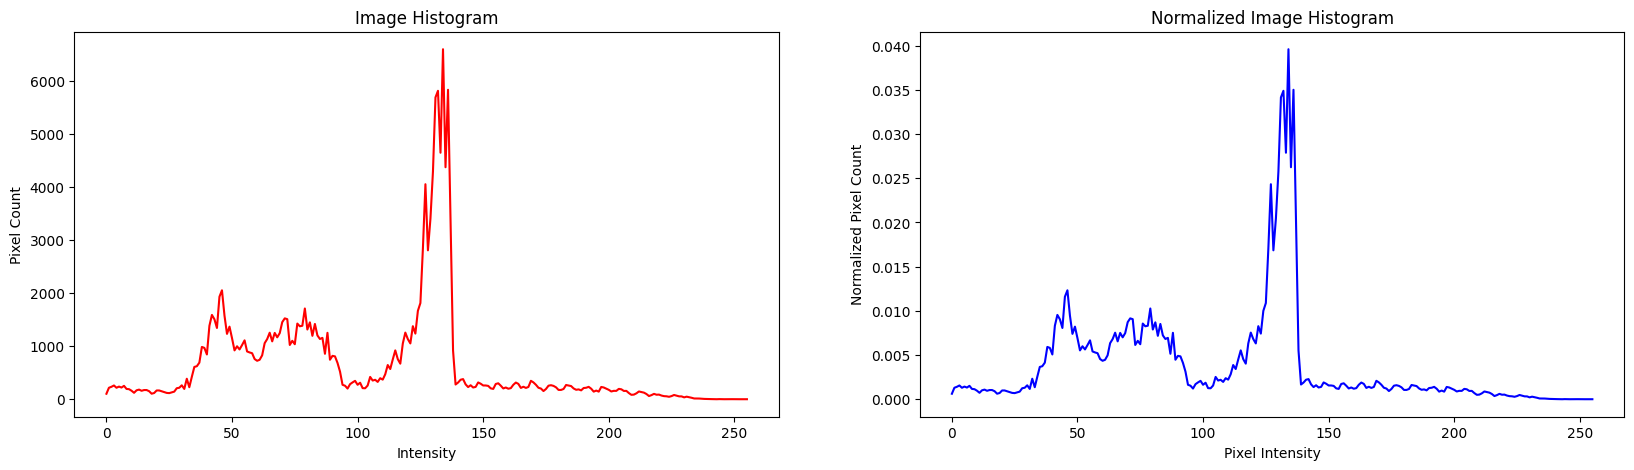

In [5]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(hist, color='r')
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')
plt.title('Image Histogram')

plt.subplot(1, 2, 2)
plt.plot(normalized_hist, color='b')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Pixel Count')
plt.title('Normalized Image Histogram')

plt.show()

In [6]:
def otsu_threshold(histogram):
    thresholds = []

    indices = np.array([i for i in range(histogram.shape[0])])
    multiplied = np.array([histogram[i]*indices[i] for i in range(histogram.shape[0])])

    combined = np.array(list(zip(histogram, indices, multiplied)))

    for i in range(combined.shape[0]):
        wb = combined[:i, 0].sum()/combined[:, 0].sum()
        wf = combined[i:, 0].sum()/combined[:, 0].sum()

        mb = 0 if combined[:i, 0].sum()==0 else combined[:i, 2].sum()/combined[:i, 0].sum()
        mf = 0 if combined[i:, 0].sum()==0 else combined[i:, 2].sum()/combined[i:, 0].sum()

        thresholds.append(wb*wf*((mb-mf)**2))
    
    return np.argmax(np.array(thresholds))

In [7]:
threshold = otsu_threshold(normalized_hist.reshape(1,-1)[0])
threshold

99

In [8]:
processed_image = image.copy()
processed_image[processed_image>threshold]=255
processed_image[processed_image<=threshold]=0

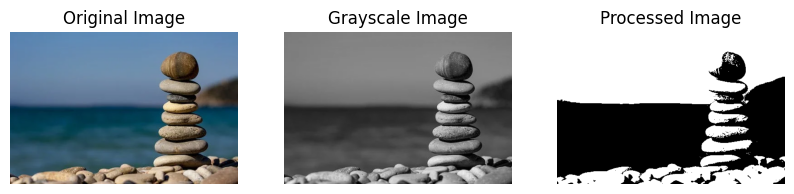

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.asarray(Image.open("./image.jpg")))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(processed_image, cmap='gray')
plt.title("Processed Image")
plt.axis('off')

plt.show()